<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Import the required libraries

In [1]:
# type your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import function to perform linear regression
from sklearn.linear_model import LinearRegression#Plotting Parameters
plt.rcParams['figure.figsize'] = [15,8]

#### Read the data

Load the csv file and set the first column as index

In [2]:
# type your code here
car = pd.read_csv('car+data.csv')
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Our objective is to predict the selling price of the cars data.

**The data definition is as follows:** <br><br>
**Car_Name:** name of the car <br>

**YearThis:** year in which the car was bought <br>

**Present_Price:** current ex-showroom price of the car (in lakhs)<br>

**Kms_Driven:** distance completed by the car in km <br>

**Fuel_Type:** fuel type of the car <br>

**Seller_Type:** defines whether the seller is a dealer or an individual<br>

**Transmission:** defines whether the car is manual or automatic <br>

**Owner:** defines the number of owners the car has previously had <br>

**Selling_Price:** price the owner wants to sell the car at (in lakhs) (response variable)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full model and interpret the beta coefficients </b>
                </font>
            </div>
        </td>
    </tr>
</table>

        Hint: A full model is a model which includes all the features 

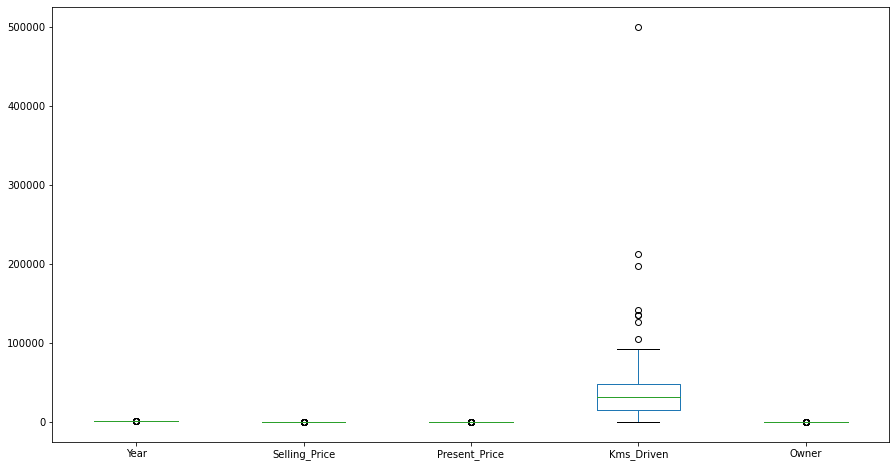

In [4]:
# type your code here
car.plot(kind='box')
plt.show()

In [5]:
import statsmodels.formula.api as sm
model = sm.ols('Selling_Price~Year+Present_Price+Kms_Driven+Owner+Seller_Type+Transmission+Fuel_Type',data = car).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     274.3
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          5.71e-131
Time:                        09:31:35   Log-Likelihood:                -593.62
No. Observations:                 301   AIC:                             1205.
Df Residuals:                     292   BIC:                             1239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -789.2366     86.522     -9.122      0.000    -959.522    -618.951
Seller_Type[T.Individual]    -1.1213      0.257     -4.371      0.000      -1.626      -0.616
Transmission[T.Manual]       -1.4482      0.328     -4.417      0.000      -2.093      -0.803
Fuel_Type[T.Diesel]           2.4699      1.278      1.932      0.054      -0.046       4.986
Fuel_Type[T.Petrol]           0.6077      1.259      0.483      0.630      -1.870       3.085
Year                          0.3931      0.043      9.159      0.000       0.309       0.478
Present_Price                 0.4372      0.016     27.355      0.000       0.406       0.469
Kms_Driven                -7.013e-06   3.23e-06     -2.172      0.031   -1.34e-05   -6.57e-07
Owner                        -0.6742      0.423     -1.595      0.112      -1.506       0.158
==============================================================================
Omnibus:                       95.107   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              696.392
Skew:                           1.075   Prob(JB):                    6.03e-152
Kurtosis:                      10.135   Cond. No.                     4.56e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there multicollinearity present? If yes, which variables are involved in multicollinearity?    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# type your code here
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = car.drop(['Selling_Price','Car_Name','Seller_Type','Transmission','Fuel_Type'],axis=1)

mylist = []

for i in range(x.shape[1]):
    mylist.append(variance_inflation_factor(x.values,i))
    
vif_df = pd.DataFrame({"Features":x.columns,'VIF':mylist})
print('The Following Variables Display Morderate Multicolinearity',vif_df)

The Following Variables Display Morderate Multicolinearity         Features       VIF
0           Year  2.408884
1  Present_Price  1.858906
2     Kms_Driven  2.001950
3          Owner  1.038791


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the impact of present price of the car and seller type on the selling price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# type your code here
model = sm.ols('Selling_Price~Present_Price+Seller_Type',data = car).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     548.4
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          1.34e-100
Time:                        09:31:35   Log-Likelihood:                -683.71
No. Observations:                 301   AIC:                             1373.
Df Residuals:                     298   BIC:                             1385.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.5423      0.261      5.901      0.000       1.028       2.057
Seller_Type[T.Individual]    -1.4493      0.331     -4.376      0.000      -2.101      -0.798
Present_Price                 0.4758      0.018     25.956      0.000       0.440       0.512
==============================================================================
Omnibus:                       72.895   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              845.311
Skew:                           0.581   Prob(JB):                    2.77e-184
Kurtosis:                      11.127   Cond. No.                         33.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Consider all the numeric features in the data. Do all of them significantly contribute to explaining the variation in the selling price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# type your code here
model1 = sm.ols('Selling_Price~Year+Present_Price+Kms_Driven+Owner',data = car).fit()
sig_feat = model1.pvalues[1:][model1.pvalues[1:]<0.05].index
print('The Significant variables are :',sig_feat.values)

The Significant variables are : ['Year' 'Present_Price' 'Owner']


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. In the model obtained in question 4, consider the interaction effect of the present price of the car and the year in which it was purchased. Compare the resultant model with the model obtained in previous question and give your interpretation 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# type your code here
model1 = sm.ols('Selling_Price~Year+Present_Price+Kms_Driven+Owner',data = car).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     426.6
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          1.66e-121
Time:                        09:31:35   Log-Likelihood:                -628.25
No. Observations:                 301   AIC:                             1267.
Df Residuals:                     296   BIC:                             1285.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -937.7642     94.392     -9.935      0.000   -1123.528    -752.000
Year              0.4661      0.047      9.949      0.000       0.374       0.558
Present_Price     0.5256      0.013     39.067      0.000       0.499       0.552
Kms_Driven    -1.267e-06   3.51e-06     -0.361      0.718   -8.17e-06    5.64e-06
Owner            -0.9513      0.466     -2.042      0.042      -1.868      -0.034
==============================================================================
Omnibus:                       69.450   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1362.873
Skew:                           0.241   Prob(JB):                    1.14e-296
Kurtosis:                      13.413   Cond. No.                     4.46e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
car["Int_Present_Price_Year"] = car["Present_Price"] * car["Year"]
model2 = sm.ols('Selling_Price~Year+Present_Price+Kms_Driven+Owner+Int_Present_Price_Year',data = car).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1546.
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          3.05e-209
Time:                        09:31:35   Log-Likelihood:                -418.79
No. Observations:                 301   AIC:                             849.6
Df Residuals:                     295   BIC:                             871.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                101.2676     58.597      1.728      0.085     -14.054     216.590
Year                      -0.0502      0.029     -1.725      0.086      -0.107       0.007
Present_Price           -137.3322      4.617    -29.744      0.000    -146.419    -128.246
Kms_Driven             -2.145e-06   1.75e-06     -1.224      0.222   -5.59e-06     1.3e-06
Owner                     -0.0618      0.235     -0.264      0.792      -0.524       0.400
Int_Present_Price_Year     0.0685      0.002     29.858      0.000       0.064       0.073
==============================================================================
Omnibus:                       37.166   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.611
Skew:                          -0.322   Prob(JB):                     2.71e-39
Kurtosis:                       6.708   Cond. No.                     5.74e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
print('There is significant Increase in the Adjusted R Squared Value between the two models,\n\
meaning that Interaction between the Present Price and year is a significant varibale.')

There is significant Increase in the Adjusted R Squared Value between the two models,
meaning that Interaction between the Present Price and year is a significant varibale.


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What is the impact of fuel type of cars on the selling price? 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# type your code here
model3 = sm.ols('Selling_Price~Fuel_Type',data = car).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     65.41
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           2.80e-24
Time:                        09:31:35   Log-Likelihood:                -861.21
No. Observations:                 301   AIC:                             1728.
Df Residuals:                     298   BIC:                             1740.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.1000      3.006      1.031      0.303      -2.816       9.016
Fuel_Type[T.Diesel]     7.1785      3.056      2.349      0.019       1.165      13.192
Fuel_Type[T.Petrol]     0.1642      3.019      0.054      0.957      -5.776       6.105
==============================================================================
Omnibus:                      149.368   Durbin-Watson:                   1.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              826.132
Skew:                           2.022   Prob(JB):                    4.05e-180
Kurtosis:                      10.036   Cond. No.                         27.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
print('Fuel Type - Petrol does seem to have a impact on the selling price with a 0.95 P Value')

Fuel Type - Petrol does seem to have a impact on the selling price with a 0.95 P Value


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the model significantly explain variation in the target variable? Justify your answer with analysis of variation 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

            Regress the selling price over the transmission.
            
            Selling_Price ~ Transmission

In [14]:
# type your code here
model4 = sm.ols('Selling_Price~Transmission',data = car).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     46.58
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           4.90e-11
Time:                        09:31:35   Log-Likelihood:                -894.20
No. Observations:                 301   AIC:                             1792.
Df Residuals:                     299   BIC:                             1800.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  9.4200      0.749     12.580      0.000       7.946      10.894
Transmission[T.Manual]    -5.4880      0.804     -6.825      0.000      -7.070      -3.906
==============================================================================
Omnibus:                      143.925   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              946.055
Skew:                           1.855   Prob(JB):                    3.69e-206
Kurtosis:                      10.853   Cond. No.                         5.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
print('With Low R Squared and a Pvalue of 0, it seems there is not much siginificance in the Transmission variable.')

With Low R Squared and a Pvalue of 0, it seems there is not much siginificance in the Transmission variable.


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Regress the selling price over the present price. Compare the 99% and 95% confidence interval of present price of a car
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# type your code here
model5 = sm.ols('Selling_Price~Present_Price',data = car).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1016.
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           3.60e-98
Time:                        09:31:35   Log-Likelihood:                -693.08
No. Observations:                 301   AIC:                             1390.
Df Residuals:                     299   BIC:                             1398.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7185      0.187      3.847      0.000       0.351       1.086
Present_Price     0.5168      0.016     31.874      0.000       0.485       0.549
==============================================================================
Omnibus:                       59.775   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              926.121
Skew:                           0.084   Prob(JB):                    7.86e-202
Kurtosis:                      11.592   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
n = car.shape[0]
s_mu = np.mean(car.Present_Price)
se = stats.sem(car.Present_Price)
df = n - 1
print('95% Confidence Interval of present price of a car is :',stats.t.interval(0.95,df,s_mu,se))
print('99% Confidence Interval of present price of a car is :',stats.t.interval(0.99,df,s_mu,se))

95% Confidence Interval of present price of a car is : (6.64798665979298, 8.608956861801706)
99% Confidence Interval of present price of a car is : (6.336879846268218, 8.92006367532647)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>9. Verify the statement: The sum of the residuals in any regression model that contains an intercept β<sub>0</sub> is always zero
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

        To verify the result, we will fit a regression model of 'Present_Price' on 'Selling_Price' 

In [17]:
# type your code here
model5 = sm.ols('Selling_Price~Present_Price',data = car).fit()
model5.summary()
print('The Sum of Residuals is :', np.sum(model5.resid))

The Sum of Residuals is : 1.3500311979441904e-13


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Consider two models as specified below. Compare the performance of the models
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

                First model:
        
        Selling_Price ~ Year + Present_Price + Kms_Driven + Owner + Fuel_Type + Seller_Type + Transmission
        
        
                Second model:
        
        Selling_Price ~ Year + Present_Price + Kms_Driven + Owner 

In [18]:
model6 = sm.ols('Selling_Price~Year+Present_Price+Kms_Driven+Owner+Fuel_Type+Seller_Type+Transmission',data = car).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     274.3
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          5.71e-131
Time:                        09:31:36   Log-Likelihood:                -593.62
No. Observations:                 301   AIC:                             1205.
Df Residuals:                     292   BIC:                             1239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -789.2366     86.522     -9.122      0.000    -959.522    -618.951
Fuel_Type[T.Diesel]           2.4699      1.278      1.932      0.054      -0.046       4.986
Fuel_Type[T.Petrol]           0.6077      1.259      0.483      0.630      -1.870       3.085
Seller_Type[T.Individual]    -1.1213      0.257     -4.371      0.000      -1.626      -0.616
Transmission[T.Manual]       -1.4482      0.328     -4.417      0.000      -2.093      -0.803
Year                          0.3931      0.043      9.159      0.000       0.309       0.478
Present_Price                 0.4372      0.016     27.355      0.000       0.406       0.469
Kms_Driven                -7.013e-06   3.23e-06     -2.172      0.031   -1.34e-05   -6.57e-07
Owner                        -0.6742      0.423     -1.595      0.112      -1.506       0.158
==============================================================================
Omnibus:                       95.107   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              696.392
Skew:                           1.075   Prob(JB):                    6.03e-152
Kurtosis:                      10.135   Cond. No.                     4.56e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# type your code here.
model7 = sm.ols('Selling_Price~Year+Present_Price+Kms_Driven+Owner',data = car).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     426.6
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          1.66e-121
Time:                        09:31:36   Log-Likelihood:                -628.25
No. Observations:                 301   AIC:                             1267.
Df Residuals:                     296   BIC:                             1285.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -937.7642     94.392     -9.935      0.000   -1123.528    -752.000
Year              0.4661      0.047      9.949      0.000       0.374       0.558
Present_Price     0.5256      0.013     39.067      0.000       0.499       0.552
Kms_Driven    -1.267e-06   3.51e-06     -0.361      0.718   -8.17e-06    5.64e-06
Owner            -0.9513      0.466     -2.042      0.042      -1.868      -0.034
==============================================================================
Omnibus:                       69.450   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1362.873
Skew:                           0.241   Prob(JB):                    1.14e-296
Kurtosis:                      13.413   Cond. No.                     4.46e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
print('The adjusted R Squared values decrease in the second model, meaning that the first model is a better fit')

The adjusted R Squared values decrease in the second model, meaning that the first model is a better fit
